# Read ERA5 netcdf file. 
# Basic data processing 
Learn xarray for more details
https://docs.xarray.dev/en/stable/

In [108]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [109]:
# read data using xarray
ds = xr.open_dataset('ERA5_mon_1940-2024.nc')

## check data by print()

In [110]:
# check data
print(ds)
# as showed below, data include two variables, t2m, tp
# check t2m
print('*'*100)
print('check t2m')
print(ds['t2m'])
# as shown below t2m is 2 metre temperature, having 5 dimension, time, long, lat, and expver

<xarray.Dataset>
Dimensions:    (longitude: 180, latitude: 91, expver: 2, time: 1009)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2024-01-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-18 06:26:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
****************************************************************************************************
check t2m
<xarray.DataArray 't2m' (time: 1009, expver: 2, latitude: 91, longitude: 180)>
[33054840 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -

## quick plot to check

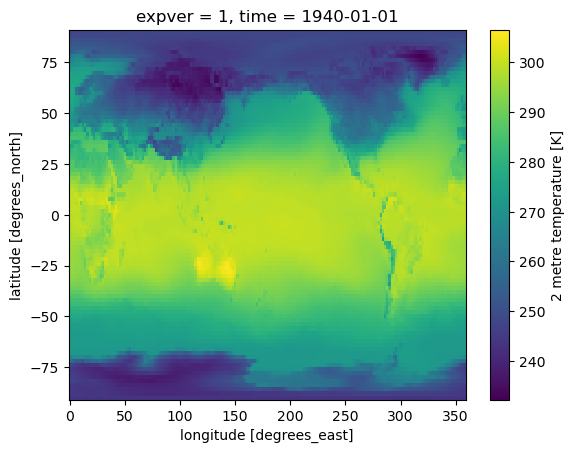

In [111]:
# plot first time step and expver 
ds['t2m'][0][0].plot()

## Task: get temperature or rainfall from data
Because data is saved in expver (index = 0) thus, select only expever index = 0

Then, data include 1009 months with 2-D grid of 91 (latitude) x 180 (longitude)

In [112]:
# temperature
temp = ds['t2m'][:,0] # expver index = 0
temp = temp.drop('expver') # drop 
print(temp)
# check time
print('='*100)
print(temp['time'])

<xarray.DataArray 't2m' (time: 1009, latitude: 91, longitude: 180)>
[16527420 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2024-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature
<xarray.DataArray 'time' (time: 1009)>
array(['1940-01-01T00:00:00.000000000', '1940-02-01T00:00:00.000000000',
       '1940-03-01T00:00:00.000000000', ..., '2023-11-01T00:00:00.000000000',
       '2023-12-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2024-01-01
Attributes:
    long_name:  time


In [101]:
# similarily 
rain = ds['tp'][:,0]
rain = rain.drop('expver') # drop 
print(rain)

<xarray.DataArray 'tp' (time: 1009, latitude: 91, longitude: 180)>
[16527420 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2024-01-01
Attributes:
    units:      m
    long_name:  Total precipitation


# Processing
## Task: extract specific region and specific time and plot it. 

Here extract data on 2020-01-01

Refer: https://docs.xarray.dev/en/latest/user-guide/indexing.html

It is called data indecing and selecting

### there are two way to do so: one use .loc[], another use .sel[]

<xarray.DataArray 't2m' (latitude: 91, longitude: 180)>
[16380 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
    time       datetime64[ns] 2020-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature


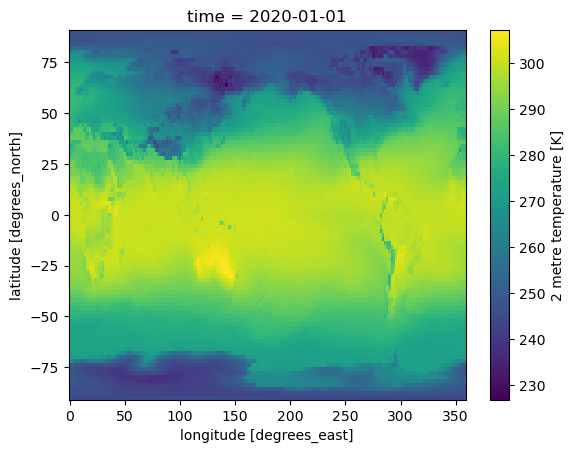

In [116]:
t1 = temp.loc['2020-01-01']
print(t1)
t1.plot()

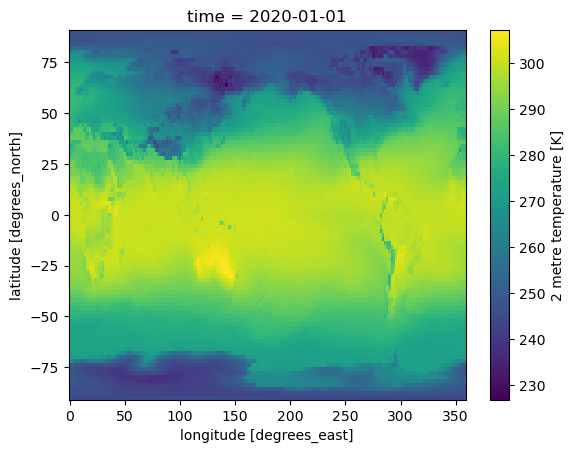

In [117]:
#or using sel
t2 = temp.sel(time='2020-01-01')
t2.plot()

### extract range of data

In [118]:
t3 = temp.sel(time = slice('2019-06-01', '2020-05-01') )
print(t3)
# t3 have 12 month from 2019-06-01 to 2020-05-01
# similarily one can use loc[]
print('*'*100)
t4 = temp.loc['2019-06-01':'2020-05-01']
print(t4)

<xarray.DataArray 't2m' (time: 12, latitude: 91, longitude: 180)>
[196560 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 2019-06-01 2019-07-01 ... 2020-05-01
Attributes:
    units:      K
    long_name:  2 metre temperature
****************************************************************************************************
<xarray.DataArray 't2m' (time: 12, latitude: 91, longitude: 180)>
[196560 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 2019-06-01 2019-07-01 ... 2020-05-01
Attributes:
    units:      K
    long_name:  2 metre temperature


## Task: extract specific region, say latitude from -20, 60; longitude from 90, 160, and plot the first time step

<xarray.DataArray 't2m' (time: 1009, latitude: 41, longitude: 36)>
[1489284 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 90.0 92.0 94.0 96.0 ... 156.0 158.0 160.0
  * latitude   (latitude) float32 60.0 58.0 56.0 54.0 ... -16.0 -18.0 -20.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2024-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature


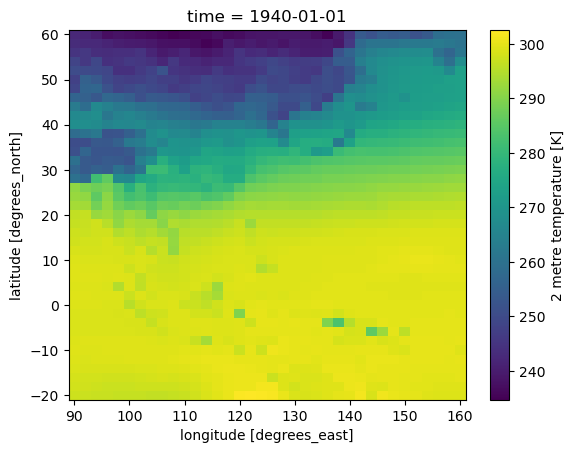

In [120]:
## extract specific region, say latitude from -20, 60; longitude from 90, 160
t5 = temp.sel(latitude=slice(60, -20), longitude=slice(90, 160))
print(t5)
# plot first time
t5[0].plot()

# Doing some statistics
## Task: calculate domain spatial average and plot time series of monthly temperature 1940 - 20024 


<xarray.DataArray 't2m' (time: 1009)>
array([275.63892, 275.02765, 274.8254 , ..., 278.273  ,       nan,
             nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2024-01-01


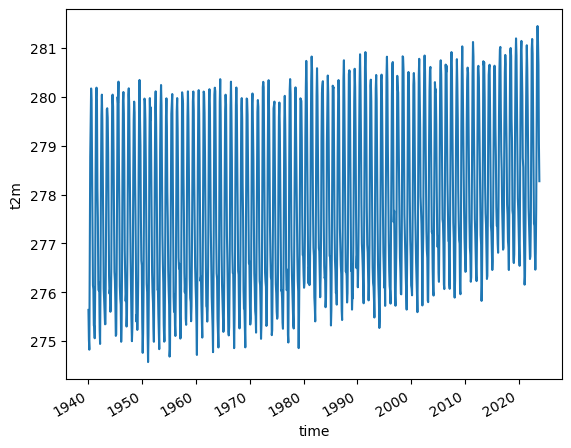

In [121]:

# average of temperarure
tavg = temp.mean(['latitude', 'longitude'])
# 
print(tavg)
tavg.plot()


## Task: calculate domain spatial average and plot time series of yearly temperature 1940 - 20024

Using groupby is very conventient tool

https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html


<xarray.DataArray 't2m' (year: 85)>
array([277.3567 , 277.3342 , 277.33762, 277.4492 , 277.60544, 277.44705,
       277.36124, 277.58762, 277.28714, 277.51694, 277.2623 , 277.34195,
       277.32065, 277.44986, 277.24524, 277.21802, 277.3065 , 277.42346,
       277.41147, 277.5482 , 277.40274, 277.47336, 277.4463 , 277.43945,
       277.17172, 277.36966, 277.34686, 277.51117, 277.35358, 277.48434,
       277.457  , 277.42545, 277.54758, 277.60098, 277.35574, 277.2741 ,
       277.19318, 277.47397, 277.4588 , 277.64542, 277.96982, 278.09903,
       277.76904, 277.91696, 277.84988, 277.72058, 277.74765, 277.7377 ,
       277.97055, 277.81113, 278.20035, 278.10934, 277.78677, 277.71957,
       277.72   , 278.03134, 277.96902, 277.96158, 278.10654, 277.91873,
       277.9433 , 278.11456, 278.29398, 278.1687 , 278.06326, 278.42477,
       278.3204 , 278.3923 , 278.17203, 278.32666, 278.358  , 278.37573,
       278.3785 , 278.35623, 278.3982 , 278.46194, 278.83832, 278.67944,
       278.6977

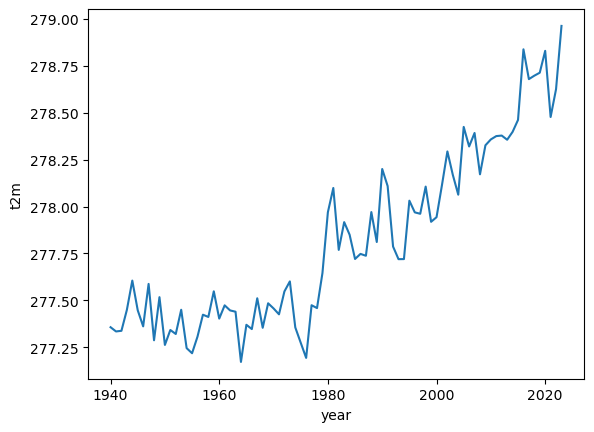

In [122]:
tavg_y = tavg.groupby('time.year').mean()
print(tavg_y)
tavg_y.plot()

## Task: extract 30 year data (1990 - 2019) for Asia region (latitude -10 ~ 60; longitude 30 - 160)
##       and plot 2-D map for temperature in 30-year avegare Jan and Dec.

In [124]:
# first select data
ta30y =  temp.sel(time = slice('1990-01-01', '2019-12-01'),latitude=slice(60, -10), longitude=slice(30, 160) )
# groupby and average
ta30ymon = ta30y.groupby('time.month').mean()
print(ta30ymon)

<xarray.DataArray 't2m' (month: 12, latitude: 36, longitude: 66)>
array([[[267.8913 , 266.51654, 264.9445 , ..., 259.12646, 260.6914 ,
         260.73273],
        [267.9435 , 267.28607, 266.07   , ..., 266.38922, 261.84787,
         256.2164 ],
        [267.86545, 267.17862, 266.56415, ..., 258.9438 , 253.28694,
         257.0607 ],
        ...,
        [294.71994, 295.68253, 294.05   , ..., 300.80487, 300.6455 ,
         300.64493],
        [293.0533 , 296.6086 , 293.31683, ..., 300.68027, 300.69543,
         300.75522],
        [293.05142, 294.881  , 299.53235, ..., 300.6921 , 300.6763 ,
         299.9273 ]],

       [[267.56284, 266.816  , 265.7023 , ..., 257.54572, 259.18503,
         259.6596 ],
        [268.07272, 267.62692, 266.5342 , ..., 263.90945, 260.39075,
         257.63928],
        [268.21033, 267.63727, 267.06573, ..., 260.47006, 254.87881,
         258.65973],
...
        [295.26355, 297.96048, 296.3597 , ..., 300.50253, 300.50473,
         300.57703],
        [294.36

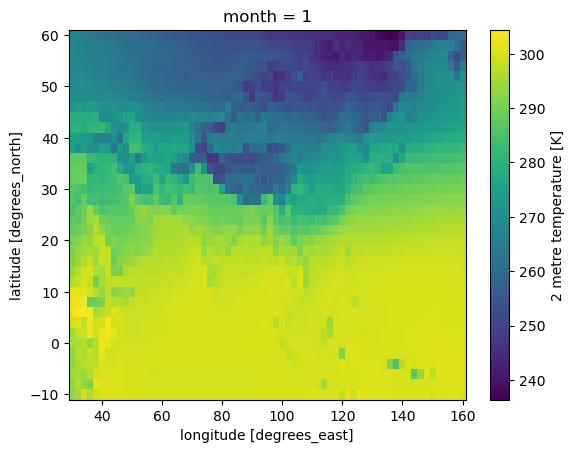

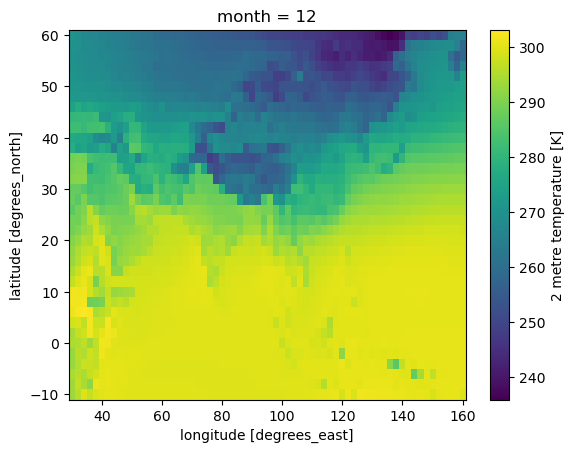

In [127]:
ta30ymon[0].plot()
plt.show()
ta30ymon[11].plot()

## Task: Do the same with about but with accumulated rainfall, not that now calculation is not average but sum

In [128]:
# first select data
ra30y =  rain.sel(time = slice('1990-01-01', '2019-12-01'),latitude=slice(60, -10), longitude=slice(30, 160) )
# groupby and sum
ra30ymon = ra30y.groupby('time.month').sum()
print(ra30ymon)


<xarray.DataArray 'tp' (month: 12, latitude: 36, longitude: 66)>
array([[[0.05469001, 0.04965531, 0.05937644, ..., 0.03341746,
         0.02602413, 0.02558581],
        [0.05065987, 0.05935631, 0.05025117, ..., 0.04628027,
         0.02777977, 0.03871517],
        [0.05374112, 0.05393184, 0.04811526, ..., 0.01843891,
         0.02634398, 0.05794184],
        ...,
        [0.21935236, 0.163319  , 0.16491468, ..., 0.22061992,
         0.35631317, 0.3491437 ],
        [0.26555562, 0.2936635 , 0.25719208, ..., 0.36588743,
         0.28653792, 0.31253842],
        [0.25141698, 0.21230969, 0.17781305, ..., 0.30316788,
         0.33543628, 0.321101  ]],

       [[0.04735355, 0.04047317, 0.04970031, ..., 0.03332859,
         0.02581445, 0.02691379],
        [0.04432087, 0.0486993 , 0.04294788, ..., 0.0389272 ,
         0.02370581, 0.04457084],
        [0.04976903, 0.05023813, 0.04548774, ..., 0.02537614,
         0.02945722, 0.05261689],
...
        [0.293859  , 0.10748579, 0.05456444, ..., 0.

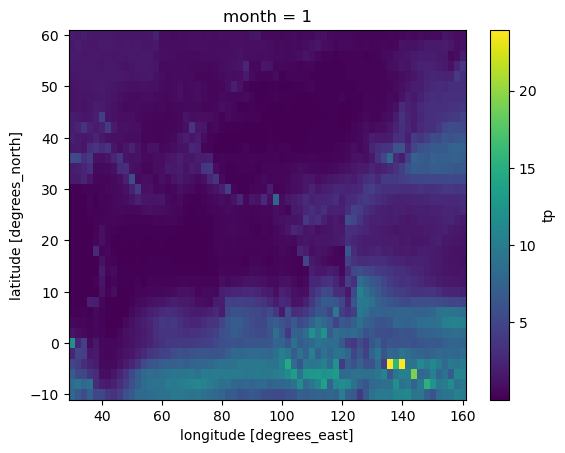

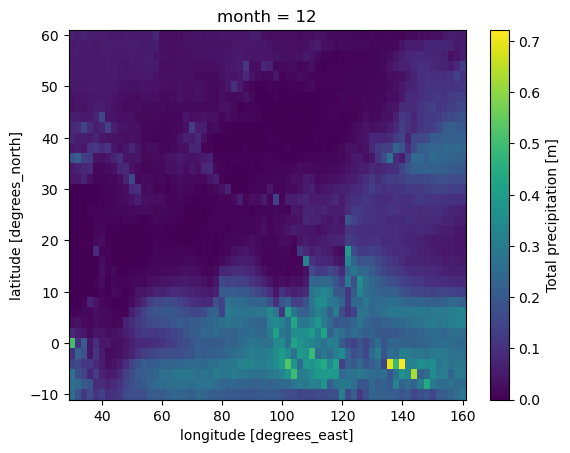

In [136]:
# because total precip is accumulated value for 1 day
# read: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview
# one need to time with number of days in month to have monthly accumulated values 
raJan = ra30ymon[0]*31
raJan.plot()
plt.show()

raDec = ra30ymon[11]
raDec.plot()

## Task: Extract point data, say near to Tibet (lat 35, long 85) and near to Tokyo (lat 35.7, long 139.7)
##       And plot time series of these

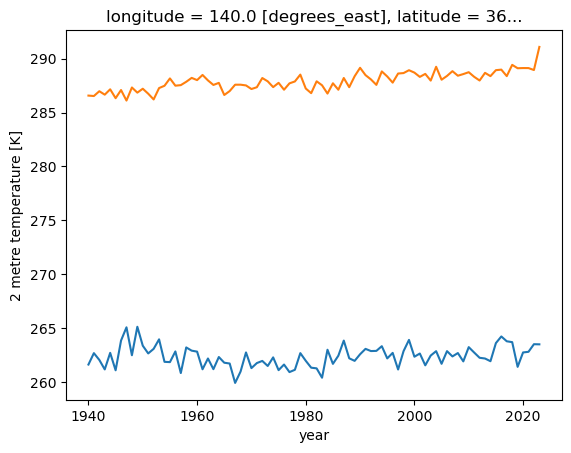

In [137]:
temp1 = temp.groupby('time.year').mean()
ttb = temp1.sel(latitude = 35, longitude = 85, method="nearest")
ttb.plot()
ttk = temp1.sel(latitude = 35.7, longitude = 139.7, method="nearest")
ttk.plot()